# Data Science Assignment:

# eCommerce Transactions Dataset

# Overview:
You are provided with an eCommerce Transactions dataset consisting of three files:
Customers.csv, Products.csv, and Transactions.csv. Your task is to perform
exploratory data analysis (EDA), build predictive models, and derive actionable insights. This
assignment will test your data analysis, machine learning, and business insight generation skills.

### Step 1: Load and Understand the Data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Increase display options for better output visibility
pd.set_option("display.max_columns", None)

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Print the first few rows of each dataset
print("Customers Data Preview:")
print(customers.head())
print("\nProducts Data Preview:")
print(products.head())
print("\nTransactions Data Preview:")
print(transactions.head())

Customers Data Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2  

In [5]:
# Quick overview of datasets
print("Customers Dataset:\n", customers.tail(), "\n")
print("Products Dataset:\n", products.tail(), "\n")
print("Transactions Dataset:\n", transactions.tail(), "\n")

Customers Dataset:
     CustomerID      CustomerName  Region  SignupDate
195      C0196       Laura Watts  Europe  2022-06-07
196      C0197  Christina Harvey  Europe  2023-03-21
197      C0198       Rebecca Ray  Europe  2022-02-27
198      C0199    Andrea Jenkins  Europe  2022-12-03
199      C0200       Kelly Cross    Asia  2023-06-11 

Products Dataset:
    ProductID             ProductName     Category   Price
95      P096    SoundWave Headphones  Electronics  307.47
96      P097      BookWorld Cookbook        Books  319.34
97      P098        SoundWave Laptop  Electronics  299.93
98      P099  SoundWave Mystery Book        Books  354.29
99      P100       HomeSense Sweater     Clothing  126.34 

Transactions Dataset:
     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-0

# 1. Data Cleaning and Preparation

In [7]:
# check for missing values

print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
# Convert date columns to datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [9]:
# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [10]:
# Check data types and fix inconsistencies
print("\nData Types:")
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


Data Types:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [11]:
# Validate data integrity (e.g., CustomerID, ProductID in respective datasets)
print("\nValidating CustomerID in Transactions matches Customers:")
print(set(transactions["CustomerID"]) - set(customers["CustomerID"]))

print("\nValidating ProductID in Transactions matches Products:")
print(set(transactions["ProductID"]) - set(products["ProductID"]))


Validating CustomerID in Transactions matches Customers:
set()

Validating ProductID in Transactions matches Products:
set()


In [12]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

In [13]:
# Save merged data for review
merged_data.to_csv("Merged_Data.csv", index=False)

In [14]:
# EDA Tasks
## General Overview
print("Data Overview:\n", merged_data.info())
print("Statistical Summary:\n", merged_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB
Data Overview:
 

In [15]:
## Unique Values and Duplicates
print("Unique Customers:", merged_data["CustomerID"].nunique())
print("Unique Products:", merged_data["ProductID"].nunique())
print("Duplicate Transactions:", merged_data.duplicated().sum())

Unique Customers: 199
Unique Products: 100
Duplicate Transactions: 0


In [16]:
## Top Performing Products
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:\n", top_products)


Top 10 Products by Revenue:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [17]:
## Region-Wise Revenue
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Region-wise Revenue:\n", region_revenue)


Region-wise Revenue:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


# 2. Descriptive Analysis

In [19]:
# General overview of datasets
print("\nCustomers Summary:")
print(customers.describe(include="all"))

print("\nProducts Summary:")
print(products.describe(include="all"))

print("\nTransactions Summary:")
print(transactions.describe())


Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        

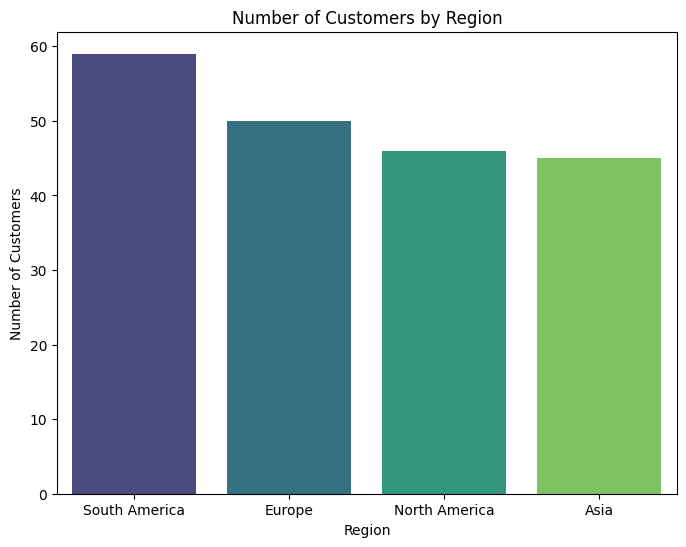

In [20]:
# Explore customer regions

region_count = customers["Region"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_count.index, y=region_count.values, palette="viridis")
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

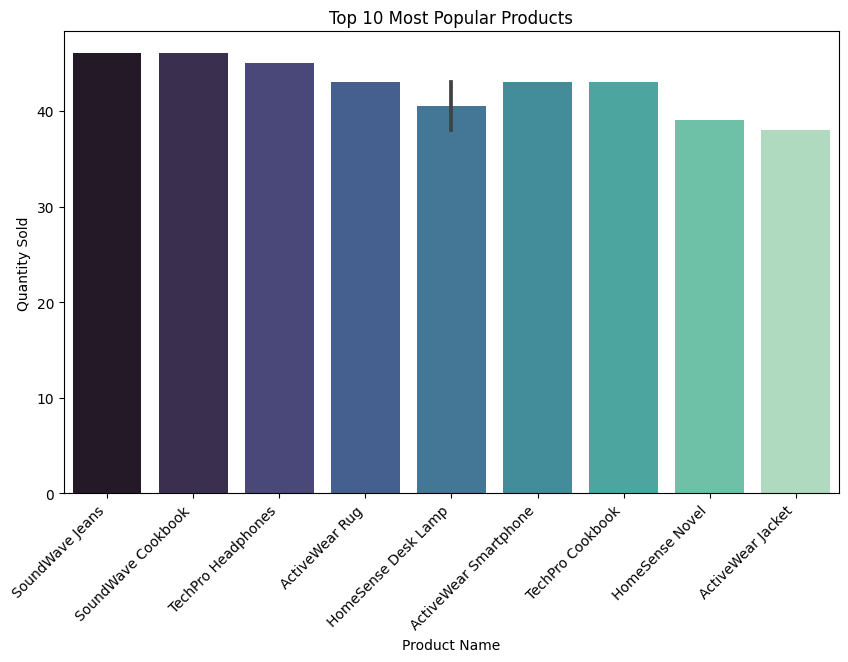

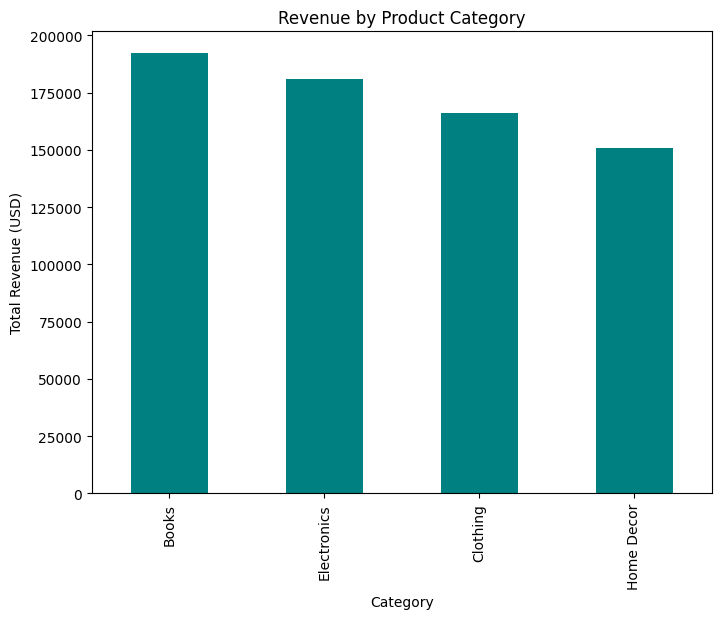

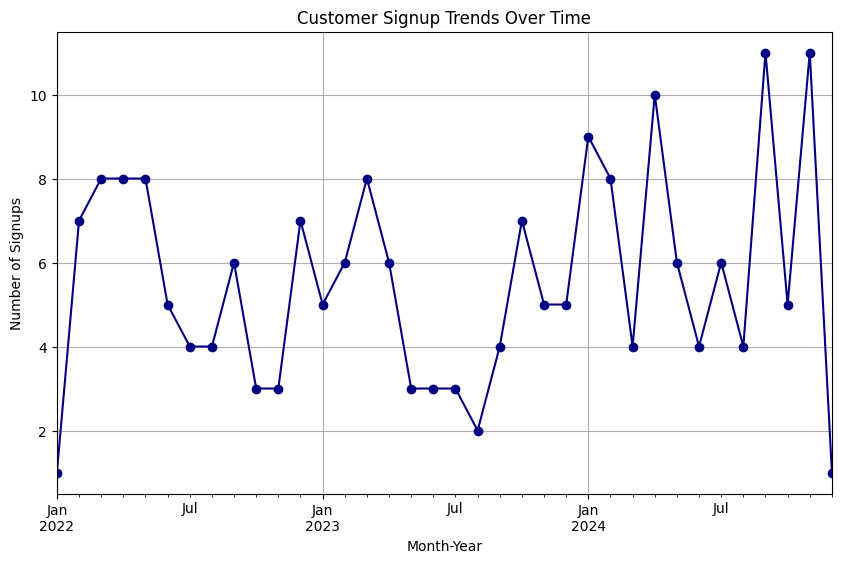

In [21]:
# Most popular products by quantity sold
popular_products = (
    transactions.groupby("ProductID")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
popular_products = popular_products.reset_index()
popular_products = popular_products.merge(products, on="ProductID", how="left")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=popular_products,
    x="ProductName",
    y="Quantity",
    palette="mako",
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()

# Revenue by category
category_revenue = (
    transactions.merge(products, on="ProductID", how="left")
    .groupby("Category")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 6))
category_revenue.plot(kind="bar", color="teal")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()


# Customer signup trends
customers["SignupMonthYear"] = customers["SignupDate"].dt.to_period("M")
signup_trends = customers["SignupMonthYear"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind="line", marker="o", color="navy")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

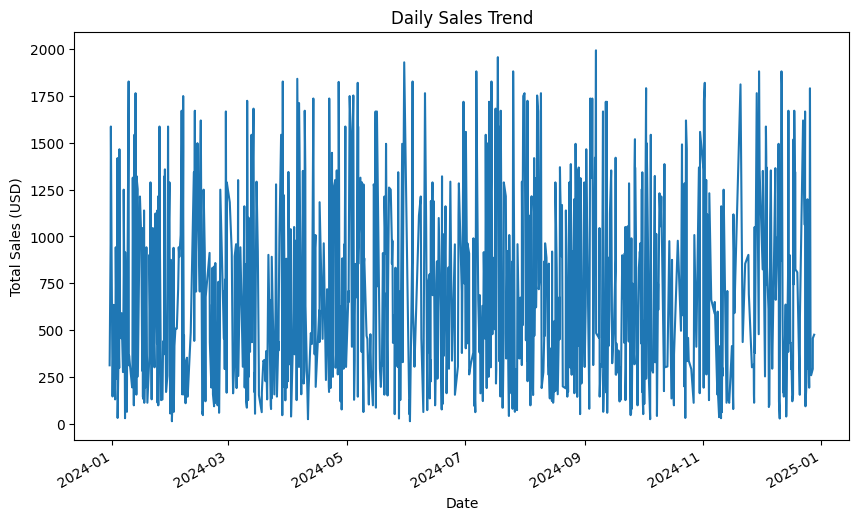

In [22]:
# Plot daily sales trend
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.show()

In [23]:
# Category-Wise Revenue
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("Category-wise Revenue:\n", category_revenue)


Category-wise Revenue:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


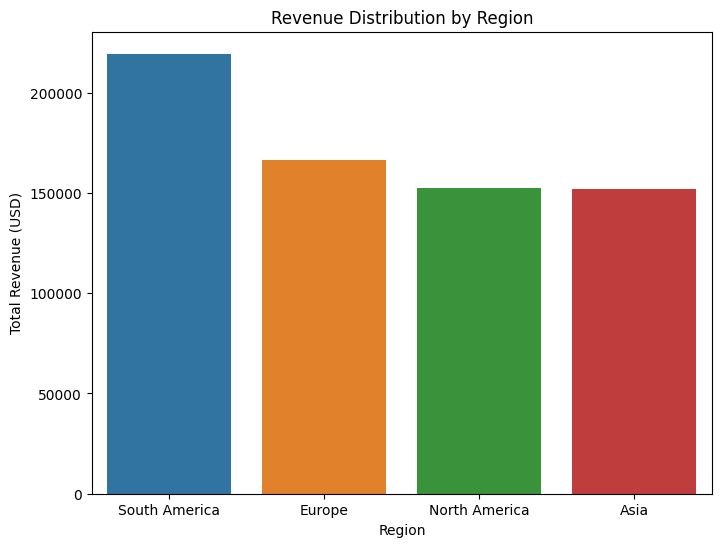

In [24]:
# Additional Visualizations
## Revenue Distribution by Region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Revenue Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()


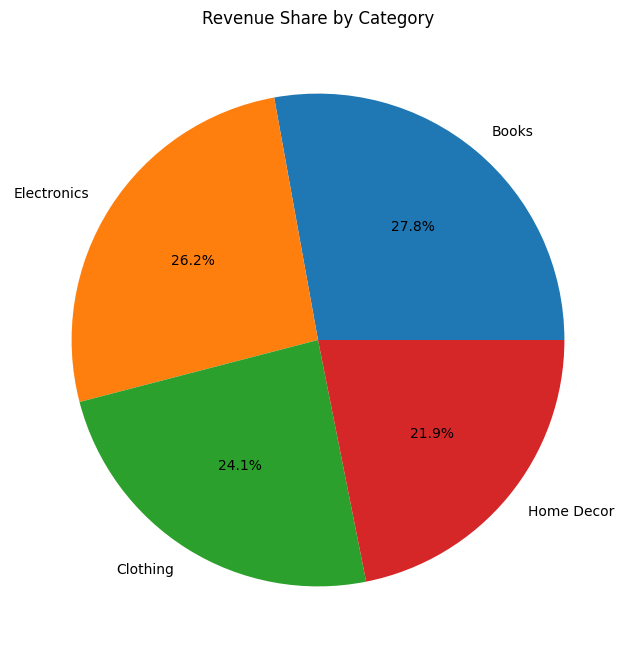

In [25]:
## Category Revenue Pie Chart
plt.figure(figsize=(8, 8))
category_revenue.plot(kind="pie", autopct="%1.1f%%")
plt.title("Revenue Share by Category")
plt.ylabel("")
plt.show()


# 3. Business Insights

In [26]:
# Insight 1: Most Popular Products
most_popular_product = popular_products.iloc[0]["ProductName"]
print(
    f"Insight 1: The most popular product is '{most_popular_product}', which sold {popular_products.iloc[0]['Quantity']} units."
)

# Insight 2: Revenue Concentration
top_category = category_revenue.idxmax()
top_category_revenue = category_revenue.max()
print(
    f"Insight 2: The product category '{top_category}' generates the highest revenue of ${top_category_revenue:,.2f}."
)

# Insight 3: Regional Customer Distribution
top_region = region_count.idxmax()
print(
    f"Insight 3: The majority of customers are from the '{top_region}' region, indicating a higher market share there."
)

# Insight 4: Customer Signup Trends
most_active_month = signup_trends.idxmax()
most_active_month_count = signup_trends.max()
print(
    f"Insight 4: The peak customer signup period was '{most_active_month}', with {most_active_month_count} new customers joining."
)

# Insight 5: High-Value Transactions
high_value_transaction = transactions["TotalValue"].max()
print(
    f"Insight 5: The highest transaction value recorded is ${high_value_transaction:,.2f}, indicating potential high-value customers."
)


Insight 1: The most popular product is 'SoundWave Jeans', which sold 46 units.
Insight 2: The product category 'Books' generates the highest revenue of $192,147.47.
Insight 3: The majority of customers are from the 'South America' region, indicating a higher market share there.
Insight 4: The peak customer signup period was '2024-09', with 11 new customers joining.
Insight 5: The highest transaction value recorded is $1,991.04, indicating potential high-value customers.
